In [1]:
from sklearn import metrics
from matplotlib import pyplot
from numpy import loadtxt
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
def AUC(language, r):
    """
    This function:
        - loads anomaly scores for the self-language (English) and inputted anomalous language
        for specified r value
        - computes sensitivity and specificity values
        - plots the corresponding ROC curve
        - computes and returns the AUC corresponding to the curve
    Input: language as one-letter string, r as integer (max contiguous substring of length r)
    Output: ROC curve and AUC value.
    """
    filename1 = "./Task1/output_e" + str(r) + ".txt"
    filename2 = "./Task1/output_" + language + str(r) + ".txt"
    print(filename1)
    arr_self = loadtxt(filename1, delimiter="'\n'")
    arr_an = loadtxt(filename2, delimiter="'\n'")
    arr_merged = np.append(arr_self, arr_an)
    arr_merged.sort()
    arr_merged_u = np.unique(arr_merged)
    
    sens = [len([a_s for a_s in arr_an if a_s > score])/len(arr_an) for score in arr_merged_u]
    spec = [len([a_s for a_s in arr_self if a_s <= score])/len(arr_self) for score in arr_merged_u]
    spec_inv = [1-s for s in spec]
    
    sens = np.append(np.append(1, sens),0)
    spec_inv = np.append(np.append(1, spec_inv),0)
    
    auc = metrics.auc(sens, np.append(np.append(0,spec),1))
    
    plt.plot(spec_inv, sens)
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.xlabel('1-specificity')
    plt.ylabel('sensitivity')
    t_string = 'ROC for r=' + str(r) + ' with AUC = ' + str(auc)
    plt.title(t_string)
    
    return auc

In [5]:
""" TASK 1"""
for r in [1,7,4]:
    plt.figure(r) 
    AUC('t',r)

# Curves in figure 1 belong to r=1, r=7 and r=4 respectively
# We find the best AUC score for r=3: AUC=0.8311

output_e1.txt


FileNotFoundError: output_e1.txt not found.

<Figure size 640x480 with 0 Axes>

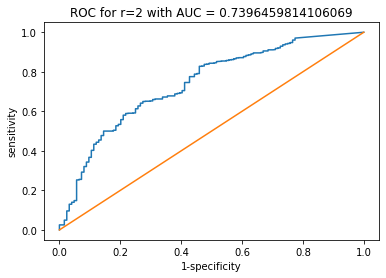

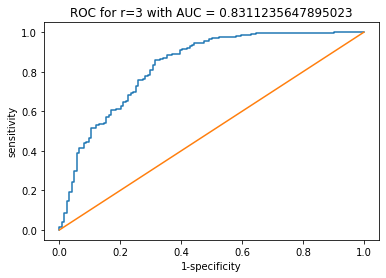

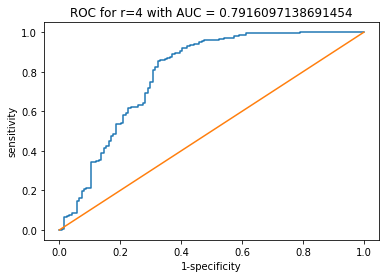

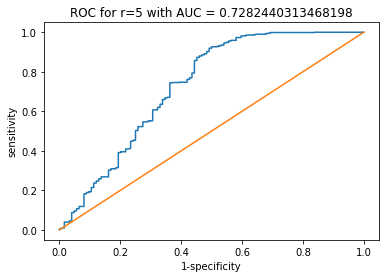

In [4]:
""" TASK 2"""
for r in [2,3,4,5]:
    plt.figure(r) 
    AUC('t',r)

# We find the best AUC score for r=3: AUC=0.8311
# Thus forward in this assignment, we will use r=3 

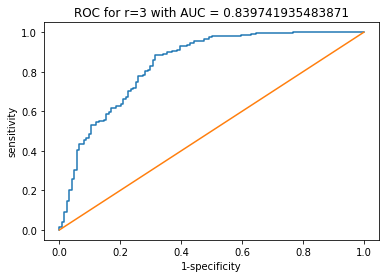

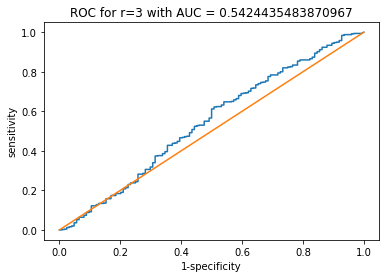

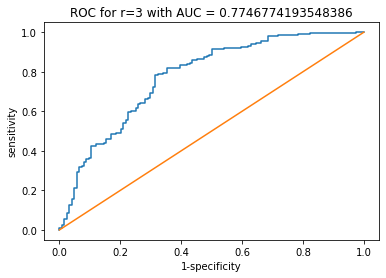

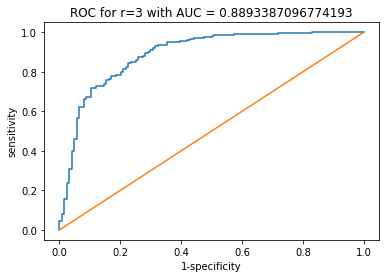

In [5]:
"""TASK 3 """
i=0
for language in ['h','m','p','x']:
    plt.figure(i)
    i+= 1
    AUC(language,r=3)
    
# We find the highest AUC for language Xhosa and the lowest AUC for Middle-English. 
# Middle-English looks the most alike English, thus is hard to distinguish from the self-language,
# resulting in a poor AUC value

In [6]:
"""
NEXT TASK
"""

'\nNEXT TASK\n'

In [32]:
def preprocess_train(file, n):
    """
    Preprocesses train file by finding all substrings of length n for each item in the train set. 
    If an item is smaller than length n, it is padded with '_' until it is of length n.
    Input: filename of the train file and integer n (destined length of strings).
    Output: Numpy array of n-length chunked test strings.
    """
    def find_substrings(line, n):
        return np.array([line[i: j] for i in range(len(line)) for j in range(i + 1, len(line) + 1) if len(line[i:j]) == n])
    
    train = loadtxt(file, delimiter="'\n'", dtype=str)
    train_processed = np.array([])
    for i in range(len(train)):
        if len(train[i])<n:
            line = train[i] + ';'*(n-len(train[i]))
            train_processed = np.append(train_processed, line).flatten()
        else:
            train_processed = np.append(train_processed, find_substrings(train[i], n)).flatten()
    return train_processed

In [33]:
def preprocess_test(file, labelfile, n):
    """
    Preprocesses test and labels file by finding all substrings of length n for each item in the train set. 
    If an item is smaller than length n, it is padded with '_' until it is of length n.
    Input: filename of the train file, filename of labels file and integer n (destined length of strings).
    Output: Three same length Numpy arrays: 
        - All n-length chunked test strings.
        - Labels per chunk
        - Corresponding initial string/item index
    """
    def find_substrings(line, n):
        return np.array([line[i: j] for i in range(len(line)) for j in range(i + 1, len(line) + 1) if len(line[i:j]) == n])
    
    test = loadtxt(file, delimiter="'\n'", dtype=str)
    labels = loadtxt(labelfile, delimiter="'\n'", dtype=str)
    test_processed = np.array([])
    labels_processed = np.array([])
    chunks = np.array([])
    for i in range(len(test)):
        label = labels[i]
        if len(test[i])<n:
            line = test[i] + ';'*(n-len(test[i]))
            test_processed = np.append(test_processed, line).flatten()
            labels_processed = np.append(labels_processed, label)
            chunks = np.append(chunks, i)
        else:
            line = test[i]
            substrings = find_substrings(test[i], n)
            test_processed = np.append(test_processed, substrings).flatten()
            labels_processed = np.append(labels_processed, [label]*len(substrings))
            chunks = np.append(chunks, [i]*len(substrings))
    return test_processed, labels_processed, chunks

In [34]:
# For first data-set
train_p = preprocess_train('snd-cert.train', 10)
np.savetxt('train_c.txt', train_p, delimiter='\n', fmt="%s")

In [35]:
test_p1, labels_p1, chunks1 = preprocess_test('snd-cert.1.test','snd-cert.1.labels', 10)
#test_p2, labels_p2, chunks2 = preprocess_test('snd-cert.2.test','snd-cert.2.labels', 100)
#test_p3, labels_p3, chunks3 = preprocess_test('snd-cert.3.test','snd-cert.3.labels', 100)

In [36]:
np.savetxt('test_c1.txt', test_p1, delimiter='\n', fmt="%s")
np.savetxt('labels_c1.txt', labels_p1, delimiter='\n', fmt="%s")
np.savetxt('chunksc1.txt', chunks1, delimiter='\n', fmt="%s")
#np.savetxt('test_c2.txt', test_p2, delimiter='\n', fmt="%s")
#np.savetxt('labels_c2.txt', labels_p2, delimiter='\n', fmt="%s")
#np.savetxt('chunksc2.txt', chunks2, delimiter='\n', fmt="%s")
#np.savetxt('test_c3.txt', test_p3, delimiter='\n', fmt="%s")
#np.savetxt('labels_c3.txt', labels_p3, delimiter='\n', fmt="%s")
#np.savetxt('chunksc3.txt', chunks3, delimiter='\n', fmt="%s")

In [127]:
# For second data-set
train_u = preprocess_train('snd-unm.train', 10)
np.savetxt('train_u.txt', train_p, delimiter='\n', fmt="%s")

In [128]:
test_u1, labels_u1, chunksu1 = preprocess_test('snd-unm.1.test','snd-unm.1.labels', 10)
test_u2, labels_u2, chunksu2= preprocess_test('snd-unm.2.test','snd-unm.2.labels', 10)
test_u3, labels_u3, chunksu3 = preprocess_test('snd-unm.2.test','snd-unm.3.labels', 10)

In [129]:
np.savetxt('test_u1.txt', test_u1, delimiter='\n', fmt="%s")
np.savetxt('labels_u1.txt', labels_u1, delimiter='\n', fmt="%s")
np.savetxt('chunksu1.txt', chunksu1, delimiter='\n', fmt="%s")
np.savetxt('test_u2.txt', test_u2, delimiter='\n', fmt="%s")
np.savetxt('labels_u2.txt', labels_u2, delimiter='\n', fmt="%s")
np.savetxt('chunksu2.txt', chunksu2, delimiter='\n', fmt="%s")
np.savetxt('test_u3.txt', test_u3, delimiter='\n', fmt="%s")
np.savetxt('labels_u3.txt', labels_u3, delimiter='\n', fmt="%s")
np.savetxt('chunksu3.txt', chunksu3, delimiter='\n', fmt="%s")

In [68]:
def AUC_2(scorefile, labelfile, chunkfile, r):
    """

    """
    scores = loadtxt(scorefile, delimiter = '\n')
    labels = loadtxt(labelfile, delimiter = '\n')
    chunks = loadtxt(chunkfile, delimiter = '\n')

    minchunk = 0
    maxchunk = chunks[len(chunks)-1]
    scores = [np.mean([scores[i] for i in range(len(scores)) if chunks[i]==c]) for c in range(minchunk, int(maxchunk))]
    labels = [np.mean([labels[i] for i in range(len(labels)) if chunks[i]==c]) for c in range(minchunk, int(maxchunk))]
    
    scores_u = np.unique(scores)
    scores_an = [scores[i] for i in range(len(scores)) if labels[i]==1]
    scores_self = [scores[i] for i in range(len(scores)) if labels[i]==0]
    
    sens = [len([a_s for a_s in scores_an if a_s > score])/len(scores_an) for score in scores_u]
    spec = [len([a_s for a_s in scores_self if a_s <= score])/len(scores_self) for score in scores_u]
    spec_inv = [1-s for s in spec]
    
    sens = np.append(np.append(1, sens),0)
    spec_inv = np.append(np.append(1, spec_inv),0)
    
    auc = metrics.auc(sens, np.append(np.append(0,spec),1))
    
    plt.plot(spec_inv, sens)
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.xlabel('1-specificity')
    plt.ylabel('sensitivity')
    t_string = 'ROC for r=' + str(r) + ' with AUC = ' + str(auc)
    plt.title(t_string)
    return scores, labels

([0.0,
  13978870620.813187,
  0.0,
  4595840715.505494,
  0.0,
  5149095734.67033,
  7192372237.010989,
  0.0,
  0.0,
  0.0,
  15947009217.098902,
  0.0,
  0.0,
  9047845222.674158,
  43197568933.95605,
  39585321855.8022,
  67433908800.56044,
  6932966859.835165,
  0.0,
  6959567091.395604,
  0.0,
  0.0,
  15975692706.483517,
  0.0,
  0.0,
  0.0,
  85493069867.3077,
  25606451234.98901,
  0.0,
  0.0,
  20788664503.813187,
  0.0,
  0.0,
  0.0,
  58411683478.34066,
  0.0,
  13978870620.813187,
  0.0,
  0.0,
  69404421465.13187,
  0.0,
  0.0,
  0.0,
  25606451234.98901,
  0.0,
  6959567091.395604,
  0.0,
  0.0,
  0.0,
  0.0,
  27314826217.35165,
  39585321855.8022,
  9233103845.076923,
  0.0,
  24137580139.527473,
  21131772888.494507,
  43141922870.42857,
  0.0,
  0.0,
  6890526057.450549,
  0.0,
  25606451234.98901,
  85494523329.84616,
  0.0,
  0.0,
  0.0,
  131006534874.62637,
  13586316533.802198,
  0.0,
  998409953.2637362,
  208597261410.75824,
  2632950885.5604396,
  28934700278

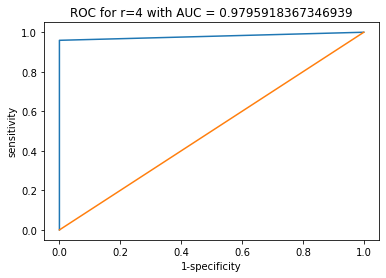

In [69]:
AUC_2('testc1.txt', 'labels_c1.txt', 'chunksc1.txt', 4)

([0.0,
  739770837099.0,
  0.0,
  141787354127.52747,
  0.0,
  131729348851.0989,
  18399393771.637363,
  0.0,
  0.0,
  0.0,
  145102150598.7143,
  0.0,
  0.0,
  332304906812.51685,
  1223211115543.989,
  2036756350547.033,
  1240420802114.2856,
  145102150598.7143,
  0.0,
  263941679170.69232,
  0.0,
  0.0,
  850555151731.6483,
  0.0,
  0.0,
  0.0,
  4499689541906.989,
  1296985513448.033,
  0.0,
  0.0,
  1017248311171.4396,
  0.0,
  0.0,
  0.0,
  2614214953466.659,
  0.0,
  739770837099.0,
  0.0,
  0.0,
  2777960694387.6265,
  0.0,
  0.0,
  0.0,
  1296985513448.033,
  0.0,
  263941679170.69232,
  0.0,
  0.0,
  0.0,
  0.0,
  280476287684.4945,
  2036756350547.033,
  145102150598.7143,
  0.0,
  840537900467.044,
  1048526825531.4835,
  280476287684.4945,
  0.0,
  0.0,
  139211181507.05493,
  0.0,
  1296985513448.033,
  4643344334260.692,
  0.0,
  0.0,
  0.0,
  6962934052418.77,
  511871846562.7692,
  0.0,
  55367627634.31868,
  11024750508141.988,
  0.0,
  1482016105891.3076,
  0.0,
  

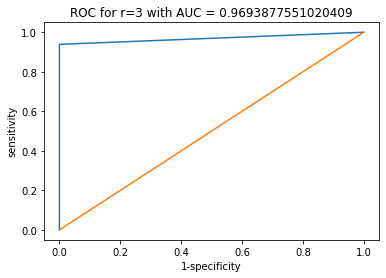

In [70]:
AUC_2('testc11.txt', 'labels_c1.txt', 'chunksc1.txt', 3)